In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Ad Click Data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      999 non-null    object 
 6   Male                      997 non-null    float64
 7   Country                   991 non-null    object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


In [4]:
df.isnull().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Ad Topic Line                0
City                         1
Male                         3
Country                      9
Timestamp                    0
Clicked on Ad                0
dtype: int64

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
null=df[df.isnull().any(axis=1)]

In [7]:
df.duplicated().sum()

0

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,953.0,64.922949,15.898081,32.60,50.78,68.18,78.41,91.43
Age,953.0,36.057712,8.758299,19.00,29.00,35.00,42.00,61.00
Area Income,953.0,55104.204103,13389.083239,13996.50,47160.53,57014.84,65620.25,79484.80
Daily Internet Usage,953.0,179.859927,43.852496,104.78,138.68,182.65,218.79,267.01
Male,953.0,0.481637,0.499925,0.00,0.00,0.00,1.00,1.00
Clicked on Ad,953.0,0.500525,0.500262,0.00,0.00,1.00,1.00,1.00


In [23]:
# determining the attribute
numeric=['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male','Timestamp','Clicked on Ad']
cate = ['Ad Topic Line','City','Country']

<Axes: xlabel='Age', ylabel='count'>

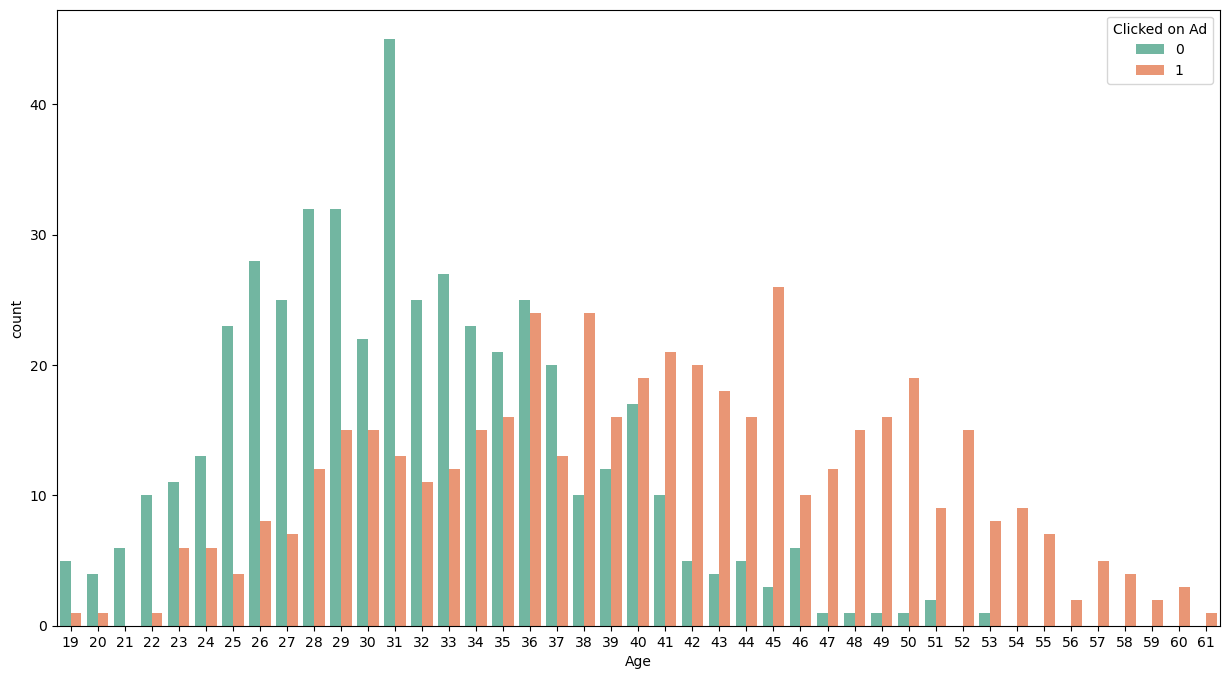

In [11]:
plt.figure(figsize=(15,8))
df['Clicked on Ad']=df['Clicked on Ad'].astype(str)
sns.countplot(x='Age',hue='Clicked on Ad',data=df,palette='Set2')

In [12]:
df['Clicked on Ad'].value_counts()

1    477
0    476
Name: Clicked on Ad, dtype: int64

C:\Users\PYadav\AppData\Local\Temp\ipykernel_17068\2442021471.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],bins=20,kde=True)


<Axes: xlabel='Age', ylabel='Density'>

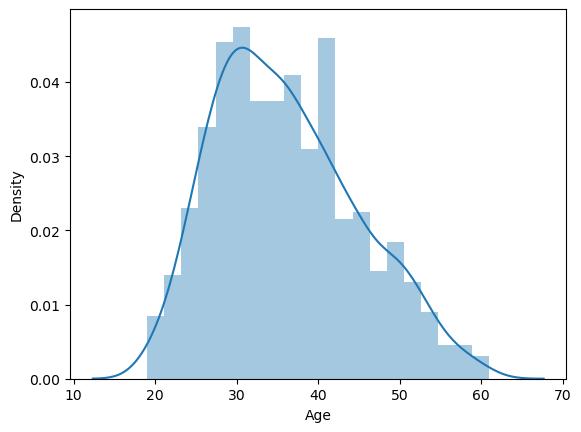

In [27]:
sns.distplot(df['Age'],bins=20,kde=True)

 most internet users age is between 26 to 40

C:\Users\PYadav\AppData\Local\Temp\ipykernel_17068\2797314251.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Daily Internet Usage'],kde=True,bins=20,hist_kws=dict(edgecolor="k", linewidth=1))


<Axes: xlabel='Daily Internet Usage', ylabel='Density'>

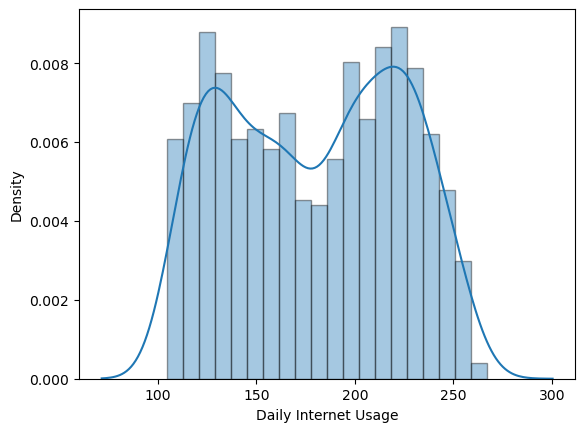

In [30]:
sns.distplot(df['Daily Internet Usage'],kde=True,bins=20,hist_kws=dict(edgecolor="k", linewidth=1))

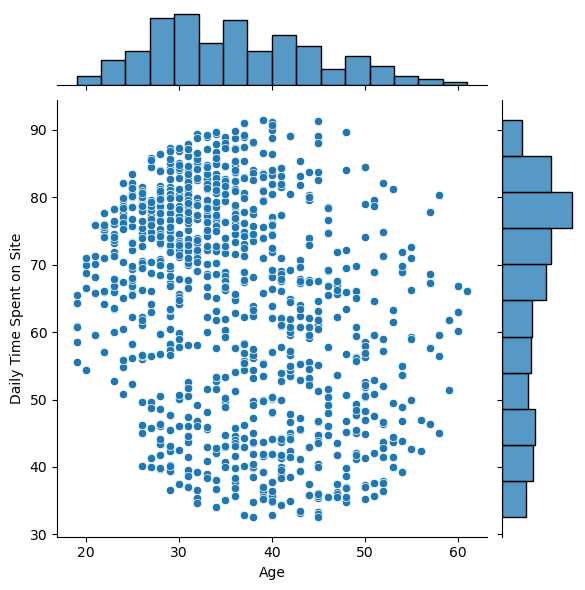

In [34]:
sns.jointplot(data=df,x='Age',y='Daily Time Spent on Site')

In [35]:
df['Country'].value_counts()

Czech Republic           9
France                   8
South Africa             8
Peru                     8
Australia                8
                        ..
Comoros                  1
Jordan                   1
Saint Kitts and Nevis    1
Romania                  1
Montenegro               1
Name: Country, Length: 235, dtype: int64

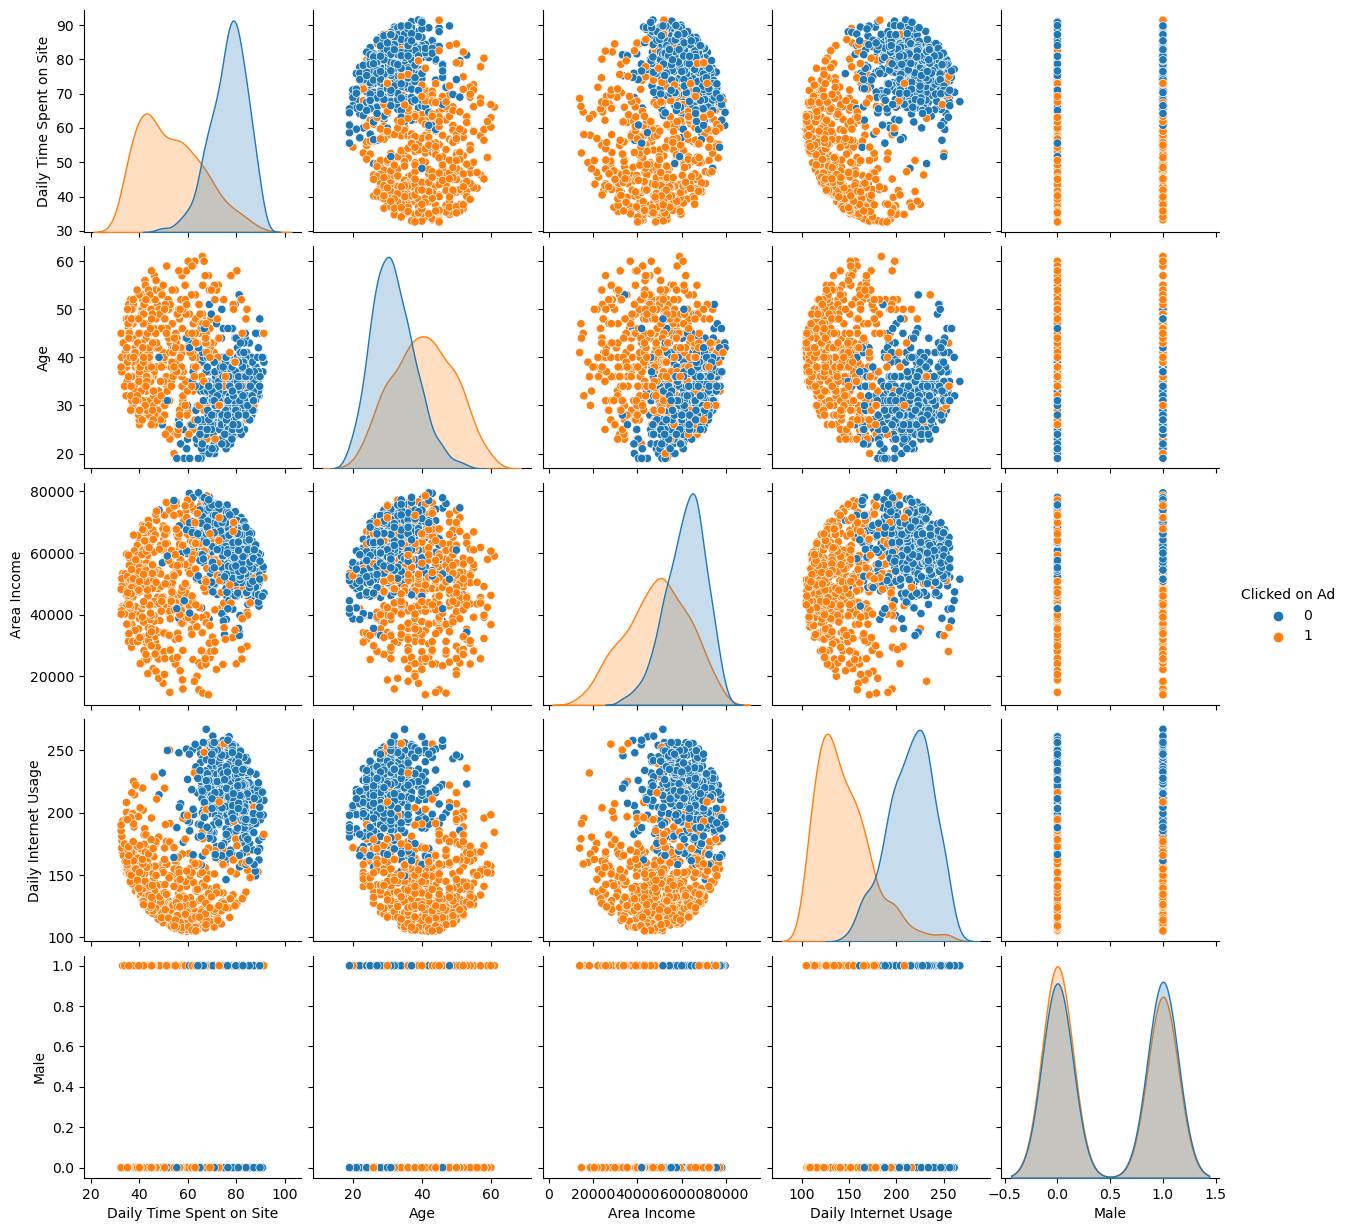

In [37]:
sns.pairplot(data=df,hue='Clicked on Ad')

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
le=LabelEncoder()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 953 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  953 non-null    float64
 1   Age                       953 non-null    int64  
 2   Area Income               953 non-null    float64
 3   Daily Internet Usage      953 non-null    float64
 4   Ad Topic Line             953 non-null    object 
 5   City                      953 non-null    object 
 6   Male                      953 non-null    float64
 7   Country                   953 non-null    object 
 8   Timestamp                 953 non-null    object 
 9   Clicked on Ad             953 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 114.2+ KB


In [65]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [68]:
df['month'] = df['Timestamp'].dt.month
df['hour'] = df['Timestamp'].dt.hour

In [71]:
df = df.drop(['Timestamp'],axis=1)

In [72]:
col=['City','Country']
for i in col:
    df[i] = le.fit_transform(df[i])

In [73]:
x=df.drop(['Clicked on Ad','Ad Topic Line'],axis=1)
y=df['Clicked on Ad']

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)

## Logistic regression

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
lr = LogisticRegression()

In [81]:
lr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
lr_pred = lr.predict(x_test)

In [87]:
from sklearn.metrics import accuracy_score

lr_accuracy = accuracy_score(lr_pred,y_test)
print(lr_accuracy*100)

93.19371727748691


## Naive Bayes

In [88]:
from sklearn.naive_bayes import GaussianNB


In [89]:
nb = GaussianNB()

In [91]:
nb.fit(x_train,y_train)

GaussianNB()

In [92]:
nb_model_pred = nb.predict(x_test)

In [94]:
nb_accuracy = accuracy_score(nb_model_pred,y_test)
print(nb_accuracy*100)

97.90575916230367


## Decision tree

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
dtc = DecisionTreeClassifier()

In [97]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [98]:
dtc_pred = dtc.predict(x_test)

In [100]:
dtc_accuracy = accuracy_score(dtc_pred,y_test)
print(dtc_accuracy*100)

95.81151832460732


### Accuracy score of naive bayes is around 98% so, its the best model to predict with

In [107]:
import numpy as np
x=[68.95,35,61833.90,256.09,918,0.0,213,3,0]
x1 = np.array(x).reshape(1,9)

In [112]:
nb_model_test = nb.predict(x1)
print('clicked on ad: ',nb_model_test)

clicked on ad:  ['0']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
